# Linear Regression

## 1.1 Vector and Matrix

In [2]:
import numpy as np
# import scipy

In [3]:
# operator
A = np.array([[1,2,3], 
              [2,2,3], 
              [1,7,3]])
B = np.array([[1,-1,2], [4,0,6], [0,1,-1]])
# add
A + B
# substraction
A - B
# multiple
A*B
Am = np.matrix(A)
Bm = np.matrix(B)
Am*Bm*Bm*Am
# matrix dot
np.dot(A, B)
# transpose
A.T
# inverse
np.linalg.inv(A)
# det
np.linalg.det(A)
# adjoint
np.linalg.inv(B)*np.linalg.det(B)

array([[-6.,  1., -6.],
       [ 4., -1.,  2.],
       [ 4., -1.,  4.]])

In [89]:
# terms
# order # map, reduce, filter
from functools import reduce 
reduce(lambda x, y: x*y, A.shape)
# diag
np.diag([1,2,4])
# scalar matrix
np.eye(3)*3
# upper triangular
np.triu(A, -2)
np.tril(A, 0)
# identity matrix
np.ones(9).reshape(3,3)
np.identity(4)
# trace
A.trace()
# rank
np.linalg.matrix_rank(A)
# p-norm
# frobenius norm
# condition number

3

## 1.2 Solve Linear Equations

$$
\begin{cases}
2x - y = -1\\\\
\frac{1}{10}x - y = -6
\end{cases}
$$

$$Ax = b$$

In [50]:
A = np.array([[2, -1], [0.1, -1]])
b = np.array([-1, -6])
A_inv = np.linalg.inv(A)
print('solution: ', np.dot(A_inv, b))

solution:  [2.63157895 6.26315789]


In [63]:
# solve equation
a = np.array([[2, -1], [0.1, -1]])
b = np.array([-1, -6])
x = np.linalg.solve(a, b)
x

array([2.63157895, 6.26315789])

In [91]:
class LinearReg:
    def __init__(self, data):
        '''data: type: pandas dataframe'''
        self.data = data
        self.length = len(data)
    def ols(self, x, y):
        '''
        x: column name
        y: column name
        '''
        X = np.matrix(np.vstack([np.ones(self.length), self.data[x].values]).T)
        y = np.matrix(self.data[y].values).T
        beta = np.linalg.inv(X.T*X)*X.T*y
        return beta
    def sklearn_ols(self, x, y):
        X = np.matrix(self.data[x].values).T
        y = np.matrix(self.data[y].values).T
        # Create linear regression object
        OLS = linear_model.LinearRegression()
        # Train the model using the training sets
        OLS.fit(X, y)
        return np.vstack([OLS.intercept_, OLS.coef_])
    def visual(self, x, y, step = 0.01):
        para = self.ols(x, y)
        X = self.data[x]
        Y = self.data[y]
        min_x, max_x = min(X), max(X)
        # x is also matrix
        func = lambda x: x*para
        x_sim = np.arange(min_x, max_x, step)
        xm = np.vstack([np.ones(len(x_sim)), x_sim]).T
        y_sim = func(xm)
        self.data.plot.scatter(x,y)
        plt.plot(x_sim, y_sim)
        plt.title('The Relationship Between {0} and {1}'.format(x, y))

## 1.3 Eigenvalues and eigenvectors

In [53]:
import numpy as np
A = np.array([[1,2,3],[3,2,1],[1,0,-1]])
w, v = np.linalg.eig(A)
print(w)
print(v)

[ 4.31662479e+00 -2.31662479e+00  1.47314580e-16]
[[ 0.58428153  0.73595785  0.40824829]
 [ 0.80407569 -0.38198836 -0.81649658]
 [ 0.10989708 -0.55897311  0.40824829]]


## 1.4 Singular Value decomposition

In [58]:
np.dot(np.dot(U, np.diag(S)), Vh)

array([[ 1.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       [ 3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  7.56448342e-16, -1.00000000e+00]])

In [56]:
U, S, Vh = np.linalg.svd(A)
print(U)
print(S)
print(Vh)

[[-7.07106781e-01  5.77350269e-01  4.08248290e-01]
 [-7.07106781e-01 -5.77350269e-01 -4.08248290e-01]
 [-2.46391293e-16 -5.77350269e-01  8.16496581e-01]]
[4.89897949e+00 2.44948974e+00 2.82334716e-16]
[[-5.77350269e-01 -5.77350269e-01 -5.77350269e-01]
 [-7.07106781e-01  9.09866946e-17  7.07106781e-01]
 [-4.08248290e-01  8.16496581e-01 -4.08248290e-01]]


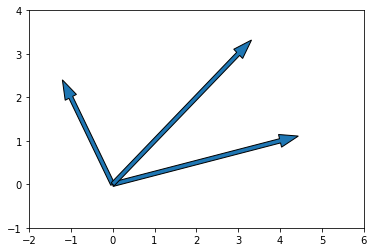

In [61]:
# plot arrow
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlim(-2, 6)
plt.ylim(-1, 4)
plt.arrow(0,0,4,1, width=0.1)
plt.arrow(0,0,-1,2, width=0.1)
plt.arrow(0,0,3,3, width=0.1)
plt.show()